# Final Project Regression
## Prediksi Harga Rumah Jabodetabek

Notebook ini berisi proses lengkap untuk membangun model regresi prediksi **harga rumah (`price_in_rp`)** menggunakan dataset **jabodetabek_house_price.csv**.

Tahapan:
1. Import library  
2. Load dataset  
3. Data understanding  
4. Data cleaning & preprocessing  
5. EDA sederhana  
6. Training beberapa model regresi  
7. Evaluasi model  
8. Kesimpulan  


In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Load Dataset

Jika memakai Google Colab + Google Drive, ubah path sesuai folder Drive kamu.

Contoh:
- **Google Colab Drive:** `/content/drive/MyDrive/UAS DATA MINING/jabodetabek_house_price.csv`
- **Lokal:** `D:/dataset/jabodetabek_house_price.csv`


In [30]:
# Jika di Google Colab, aktifkan ini:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/UAS DATA MINING/jabodetabek_house_price.csv'  # <- UBAH SESUAI PATH FILE KAMU

# Kalau mau tes lokal (bukan colab), contoh:
# file_path = 'jabodetabek_house_price.csv'

df_raw = pd.read_csv(file_path)
print('Shape:', df_raw.shape)
df_raw.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (3553, 27)


,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


## 2) Data Understanding

Mengecek tipe data, statistik deskriptif, dan persentase missing value.


In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [20]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,3553,3552,https://www.rumah123.com/properti/tangerang/ho...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_in_rp,3553.0,NaN,NaN,NaN,4191684773.430903,13750673820.538645,42000000.0,800000000.0,1500000000.0,3590000000.0,580000000000.0
title,3553,3342,"Sentul City,bogor",21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,3553,397,"Sentul City, Bogor",282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district,3553,380,Sentul City,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,3553,9,Bogor,881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,3553.0,NaN,NaN,NaN,-6.324721,0.129245,-6.894828,-6.397933,-6.300733,-6.231754,-6.102478
long,3553.0,NaN,NaN,NaN,106.792881,0.172159,106.402315,106.687295,106.799954,106.874766,109.771691
facilities,3553,2024,"Keamanan, Taman",400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,3552,1,rumah,3552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
missing_pct = df_raw.isna().mean().sort_values(ascending=False) * 100
missing_pct.head(20)


,0
building_orientation,46.355193
year_built,40.669856
building_age,40.669856
furnishing,10.892204
property_condition,6.923726
certificate,3.968477
bedrooms,0.956938
bathrooms,0.816212
floors,0.168871
ads_id,0.112581


## 3) Menentukan Target dan Feature

Target yang diprediksi:
- `price_in_rp`

Kolom yang di-drop karena tidak relevan / teks panjang / terlalu unik:
- `url`, `title`, `ads_id`, `facilities`, `address`


In [22]:
target_col = 'price_in_rp'

df = df_raw.copy()

# Buang baris target kosong
df = df[df[target_col].notna()].copy()

drop_cols = ['url', 'title', 'ads_id', 'facilities', 'address']
drop_cols = [c for c in drop_cols if c in df.columns]

print('Kolom yang di-drop:', drop_cols)
df = df.drop(columns=drop_cols)

print('Shape setelah cleaning awal:', df.shape)
df.head()


Kolom yang di-drop: ['url', 'title', 'ads_id', 'facilities', 'address']
Shape setelah cleaning awal: (3553, 22)


,price_in_rp,district,city,lat,long,property_type,bedrooms,bathrooms,land_size_m2,building_size_m2,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,4.0,239.0,272.0,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,2.0,55.0,69.0,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,119.0,131.0,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,3.0,3.0,180.0,174.0,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,rumah,4.0,3.0,328.0,196.0,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


## 4) EDA Sederhana

### 4.1 Distribusi Harga


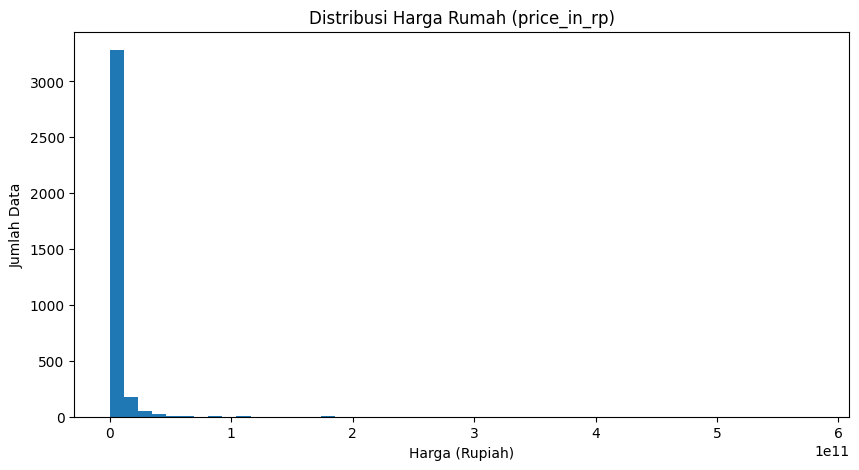

In [23]:
plt.figure(figsize=(10,5))
plt.hist(df[target_col], bins=50)
plt.title('Distribusi Harga Rumah (price_in_rp)')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Jumlah Data')
plt.show()


### 4.2 Korelasi Fitur Numerik


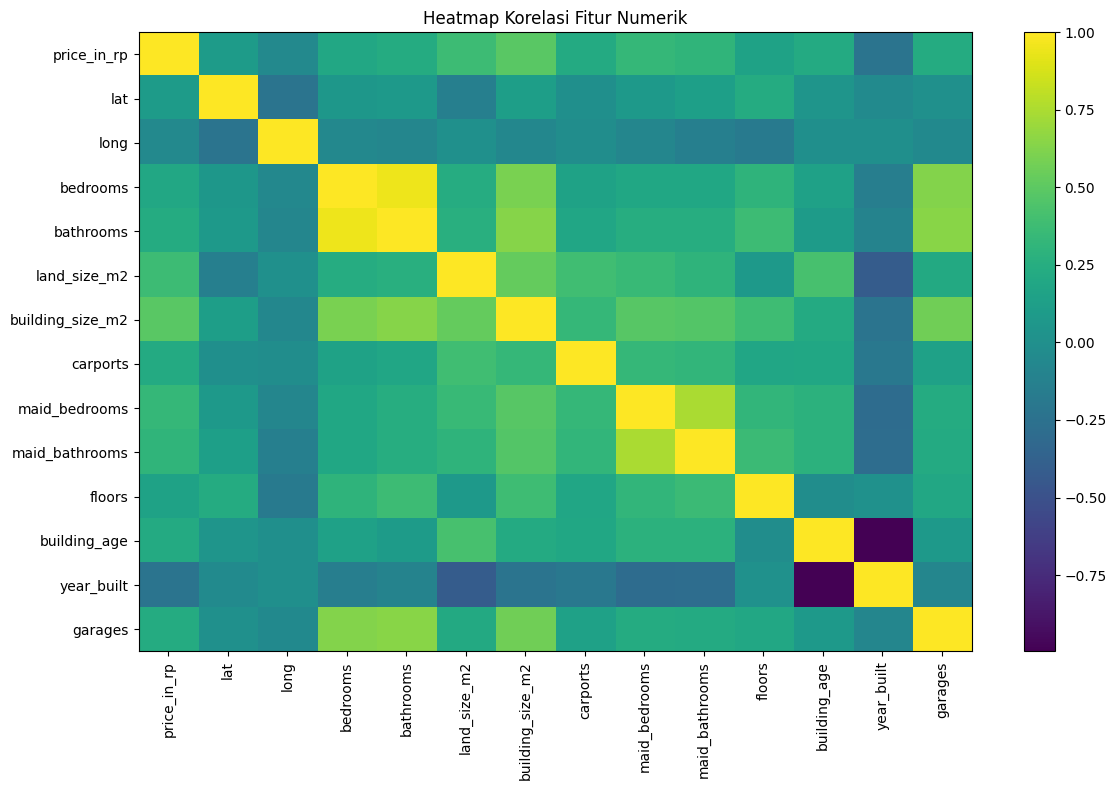

In [24]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(12,8))
plt.imshow(corr, aspect='auto')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()


## 5) Split Data (Train/Test)

Menggunakan pembagian:
- Train: 80%
- Test : 20%


In [25]:
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Train:', X_train.shape, y_train.shape)
print('Test :', X_test.shape, y_test.shape)


Train: (2842, 21) (2842,)
Test : (711, 21) (711,)


## 6) Preprocessing (Imputer + OneHotEncoder)

- Numerik: imputasi median  
- Kategorikal: imputasi most_frequent + OneHotEncoder  


In [26]:
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in X_train.columns if c not in num_features]

print('Jumlah fitur numerik   :', len(num_features))
print('Jumlah fitur kategorikal:', len(cat_features))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


Jumlah fitur numerik   : 13
Jumlah fitur kategorikal: 8


## 7) Training Model Regresi & Evaluasi

Model yang diuji:
1. Linear Regression  
2. Ridge Regression  
3. Lasso Regression  
4. Decision Tree Regressor  
5. Random Forest Regressor  


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.001, random_state=42, max_iter=5000),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
results_df = results_df.sort_values(by='R2', ascending=False).reset_index(drop=True)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9951777850388696e+23, tolerance: 6.197429818270591e+19
  model = cd_fast.sparse_enet_coordinate_descent(


,Model,MAE,RMSE,R2
0,Ridge,2.440878e+09,5.117659e+09,0.640927
1,LinearRegression,2.618174e+09,5.746261e+09,0.547299
2,Lasso,2.649720e+09,5.789625e+09,0.540441
3,RandomForest,1.383797e+09,6.372587e+09,0.443235
4,DecisionTree,1.647491e+09,8.226723e+09,0.072115


## 8) Kesimpulan

Pilih model terbaik berdasarkan:
- **R² tertinggi**
- **MAE & RMSE terendah**


In [28]:
best_model = results_df.iloc[0]
print("Model terbaik berdasarkan R2 tertinggi:")
best_model


Model terbaik berdasarkan R2 tertinggi:


,0
Model,Ridge
MAE,2440878359.251111
RMSE,5117658669.006568
R2,0.640927


## 9) Prediksi Data Baru (Opsional)

Melakukan prediksi dari beberapa sample data test.


In [29]:
best_model_name = best_model['Model']
final_model = models[best_model_name]

final_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', final_model)
])

final_pipe.fit(X_train, y_train)

sample = X_test.head(5)
pred_price = final_pipe.predict(sample)

pd.DataFrame({
    'Harga_Asli': y_test.head(5).values,
    'Harga_Prediksi': pred_price
})


,Harga_Asli,Harga_Prediksi
0,1.050000e+09,-6.644961e+08
1,2.250000e+09,3.496423e+09
2,6.600000e+08,1.461271e+09
3,8.750000e+08,5.046032e+08
4,8.990000e+08,9.189444e+08
